In [1]:
import os
import cv2
import random

from tqdm import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

['conv1-weight.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-weight.jpg']


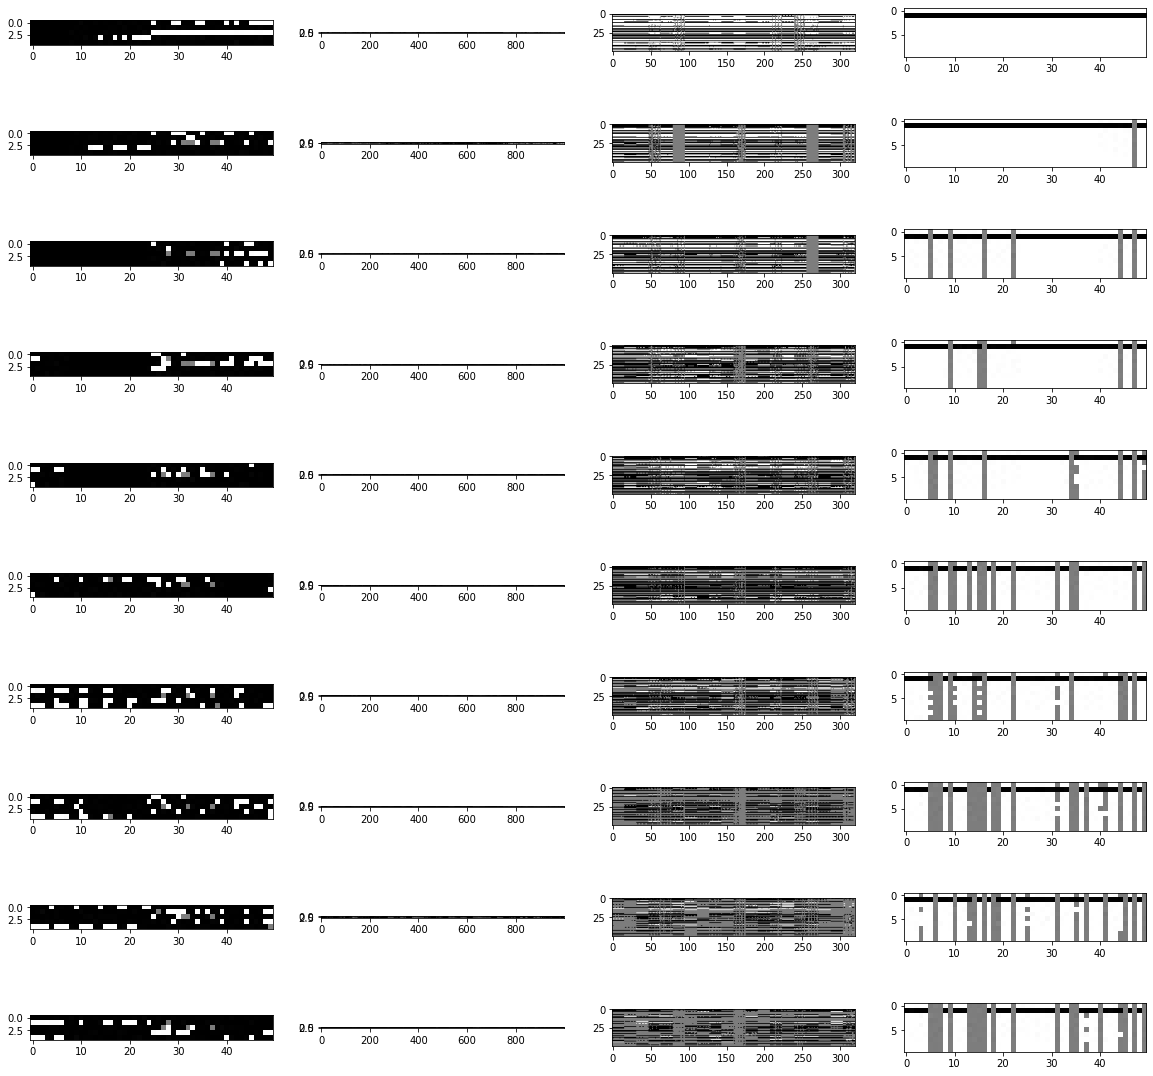

In [51]:
f, axs = plt.subplots(10,4, figsize=(20,20))
# plt.axis("off")
client = 'client:3'
round_ = 'round:1'
# weight = ['conv1-bias.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-bias.jpg', 'conv1-weight.jpg', 'fc2-weight.jpg', 'fc1-bias.jpg', 'conv2-bias.jpg']
weight = ['conv1-weight.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-weight.jpg']
print(weight)
for i in range(10):
    imgs_path = ['result/' + client + '/' + 'round:'+ str(i+1) + '/' + w for w in weight]
    for j in range(4):
        # axs[i][j].title(imgs_path[j])
        axs[i][j].imshow(cv2.imread(imgs_path[j]))
        



['conv1-weight.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-weight.jpg']


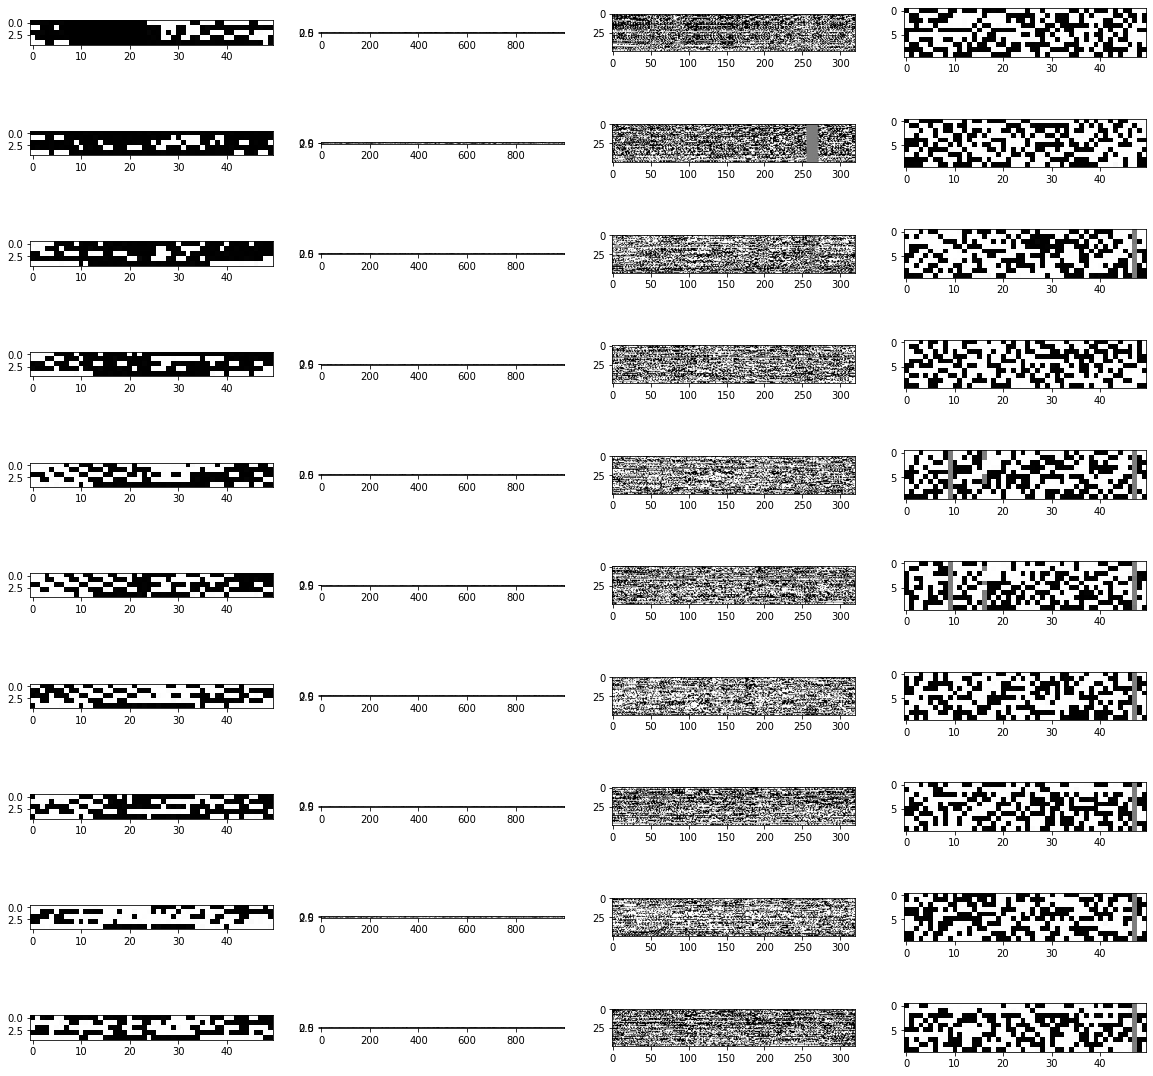

In [52]:
f, axs = plt.subplots(10,4, figsize=(20,20))
# plt.axis("off")
client = 'client:7'
# round_ = 'round:1'
# weight = ['conv1-bias.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-bias.jpg', 'conv1-weight.jpg', 'fc2-weight.jpg', 'fc1-bias.jpg', 'conv2-bias.jpg']
weight = ['conv1-weight.jpg', 'conv2-weight.jpg', 'fc1-weight.jpg', 'fc2-weight.jpg']
print(weight)
for i in range(10):
    imgs_path = ['result/' + client + '/' + 'round:'+ str(i+1) + '/' + w for w in weight]
    for j in range(4):
        # axs[i][j].title(imgs_path[j])
        axs[i][j].imshow(cv2.imread(imgs_path[j]))

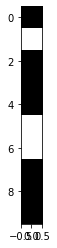

In [29]:
plt.imshow(cv2.imread('result/client:0/round:1/conv1-bias.jpg'))

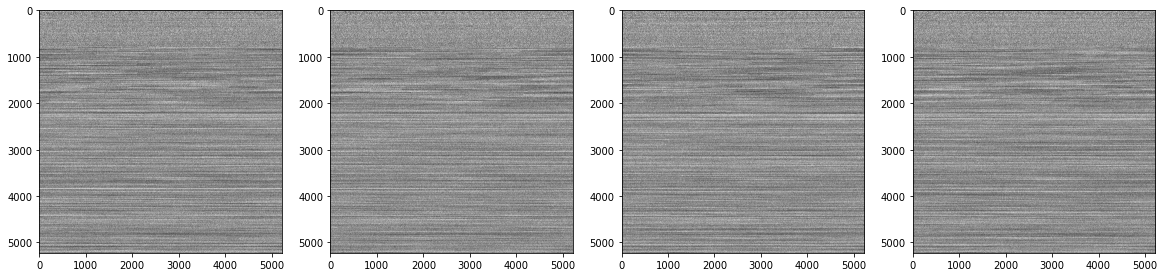

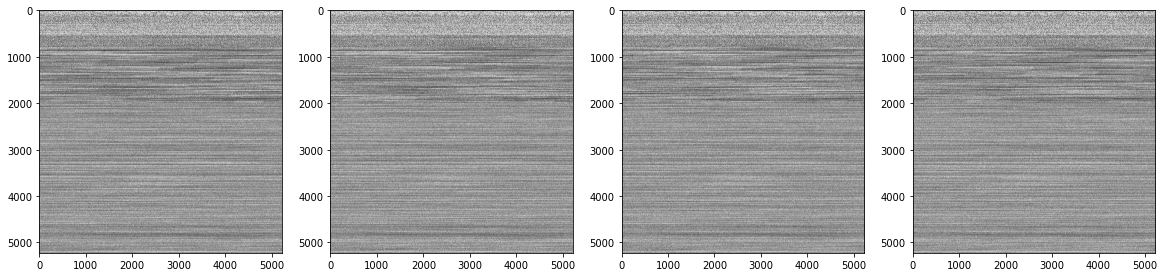

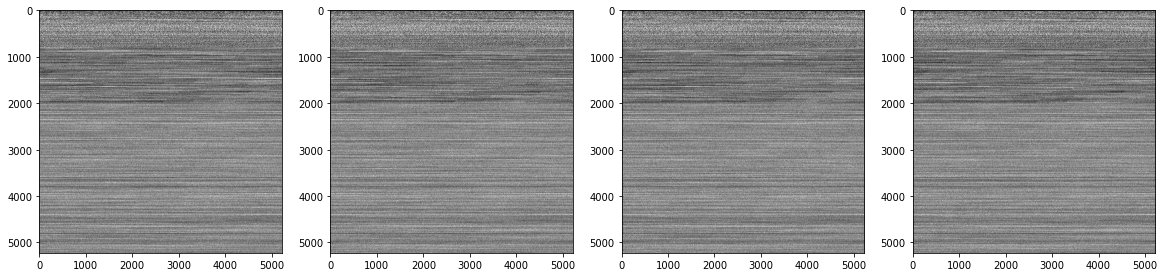

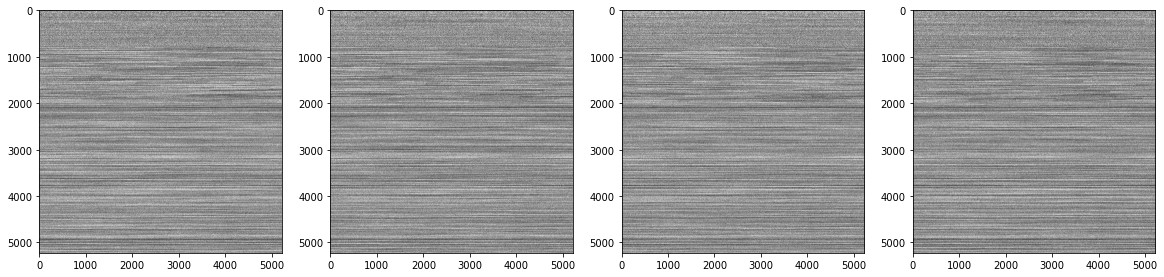

In [5]:
import matplotlib.pyplot as plt
import cv2

def printSignImg(client_id,round):
    for r in round:
        f, axs = plt.subplots(1,len(client_id), figsize=(20,20))
        for i in client_id:
            imgs_path = '/home/featurize/result/signimg/P_FedSIGN/iid/' + str(r) +'/client:'+str(i)+ '.png'
            axs[i].imshow(plt.imread(imgs_path),cmap='Greys_r')

printSignImg([0,1,2,3],[1,10,20,30])

In [2]:
import torch
import cv2
def imgToVec(i,r,path):
    # img_path = '/home/featurize/result/signimg/P_FedSIGN/iid/' + str(r) +'/client:'+str(i)+ '.png'
    img_path = path + str(r) + '/client:' + str(i) +'.png'
    # print(img_path)
    img = cv2.imread(img_path)
    img = torch.Tensor(img).view(-1)
    tt = torch.where(img==0,torch.full_like(img,-1),img)
    tt = torch.where(img==255,torch.full_like(img,1),tt)
    tt = torch.where(img==125,torch.full_like(img,0),tt)
    return tt.numpy()


In [6]:
from sklearn import metrics
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

iid_path = '/home/featurize/result/signimg/R_mipc_replace_iid_12/iid/'
iid = [imgToVec(i,200,iid_path) for i in range(20)]

non_path = '/home/featurize/result/signimg/R_mipc_replace_noniid_12/noniid/'
non = [imgToVec(i,200,non_path) for i in range(20)]

def edu(x,y):
    n = len(x)
    tmp = 0
    for i in range(n):
        tmp = (x[i]-n[i])**2 + tmp
    return tmp**(1/2)

M = np.random.rand(len(iid),len(iid))
M1 = np.random.rand(len(iid),len(iid))
nnn = 0
K_iid = []
K_non = []

def edu(x,y):
    return pow(np.sum((x-y)**2),2)

for i in range(len(iid)):
    print(nnn)
    nnn = nnn + 1
    for j in range(len(iid)):
        if i>j: # 计算noniid
            M[i][j] = metrics.normalized_mutual_info_score(non[i],non[j])
            M1[i][j] = edu(non[i],non[j])
            K_non.append(M[i][j])
        else: # 计算iid
            M[i][j] = metrics.normalized_mutual_info_score(iid[i],iid[j])
            M1[i][j] = edu(iid[i],iid[j])
            if i!=j:
                K_iid.append(M[i][j])

K_iid = sorted(K_iid,reverse=True)
K_non = sorted(K_non,reverse=True)

idx = 45

dc_iid = K_iid[idx]
dc_non = K_non[idx]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [4]:
import pandas as pd

def nor(M):
    iid_max_M = 0
    iid_min_M = 0
    non_max_M = 0
    non_min_M = 0
    for i in range(len(M)):
        for j in range(len(M)):
            if i>j: # noniid
                M_ij = M[i][j]
                if non_max_M<M_ij:
                    non_max_M = M_ij
                if non_min_M>M_ij:
                    non_min_M = M_ij
            elif i<j:
                M_ij = M[i][j]
                if iid_max_M<M_ij:
                    iid_max_M = M_ij
                if iid_min_M>M_ij:
                    iid_min_M = M_ij               
            else:
                pass
    # print(iid_max_M)
    tmp = np.ones_like(M)         
    for i in range(len(tmp)):
        for j in range(len(tmp)):
            if i>j: # noniid
                tmp[i][j] = (M[i][j]-non_min_M)/non_max_M
            elif i<j:
                tmp[i][j] = (M[i][j]-iid_min_M)/iid_max_M
            else:
                tmp[i][j] = M[i][j]
    return tmp

def toStripplot(M):

    dc_iid = 0
    dc_non = 0

    iid_values=[]
    non_values=[]

    for i in range(20):
        for j in range(20):
            if i>j: # 此时noniid
                non_values.append(M[i][j])
            elif i<j:
                iid_values.append(M[i][j])
            else:
                pass
    
    dc_iid = sorted(iid_values,reverse=True)[45]
    dc_non = sorted(non_values,reverse=True)[45]

    df_iid = pd.DataFrame()
    df_non = pd.DataFrame()

    client = []
    value_iid = []
    value_non = []
    label_iid = []
    label_non = []

    for i in range(20):
        for j in range(20):
            if i!=j:
                client.append(int(i))
                if i>j: # 这时候得到的是非独立同分布下的数据，独立同分布下的数据是相反值
                    iid_data = M[j][i]
                    non_data = M[i][j]
                else:
                    iid_data = M[i][j]
                    non_data = M[j][i]
                value_iid.append(iid_data)
                value_non.append(non_data)
                if iid_data>dc_iid:
                    label_iid.append('True')
                else:
                    label_iid.append('False')
                if non_data>dc_non:
                    label_non.append('True')
                else:
                    label_non.append('False')

    df_iid['client'] = client
    df_iid['value'] = value_iid
    df_iid['cutoff'] = label_iid

    df_non['client'] = client
    df_non['value'] = value_non
    df_non['cutoff'] = label_non

    return df_iid,df_non

<AxesSubplot:xlabel='client', ylabel='value'>

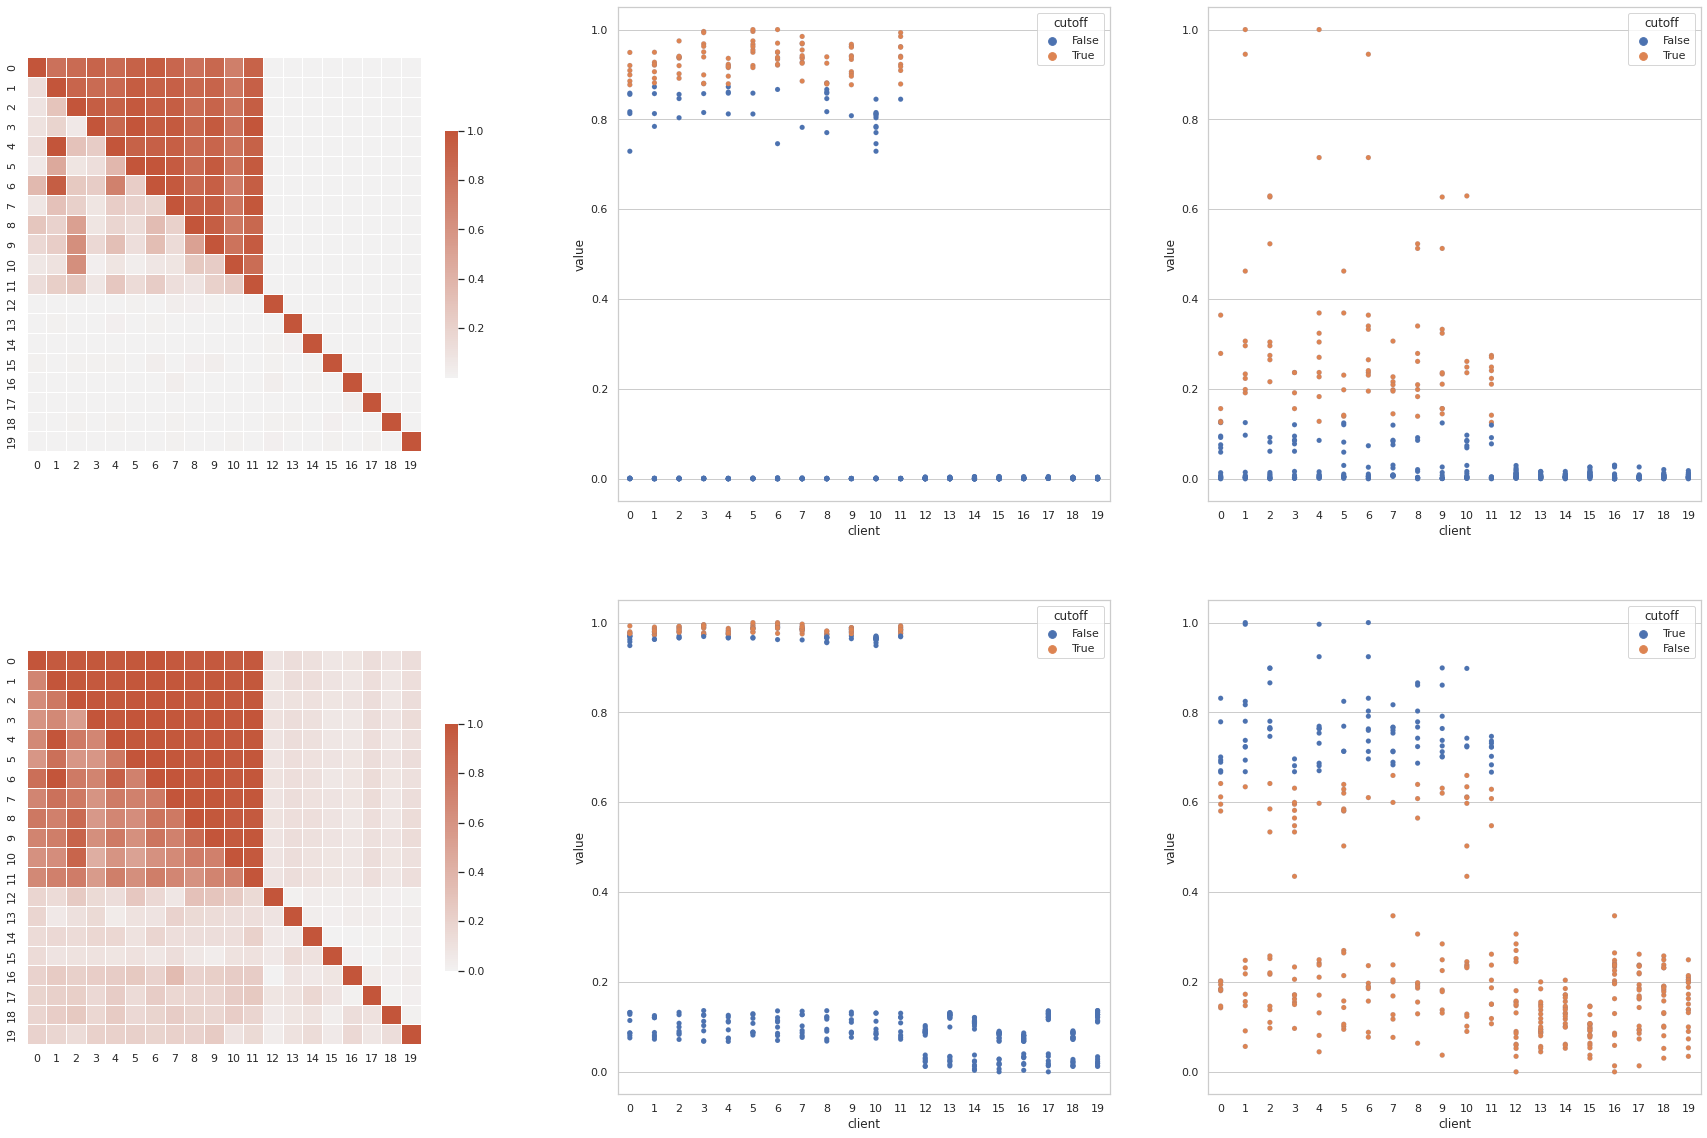

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nor_M = nor(M)
nor_M1 = 1-nor(M1)
nor_M1 = nor(nor_M1)

# nor_M = M
# nor_M1 = M1

df_M_iid,df_M_non = toStripplot(nor_M)
df_M1_iid,df_M1_non = toStripplot(nor_M1)

sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 20, as_cmap=True)

sns.heatmap(nor_M, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax[0][0])

sns.heatmap(nor_M1, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},ax=ax[1][0])

sns.stripplot(x="client", y="value", hue="cutoff", 
              jitter=False,linewidth=0.1,edgecolor='b',data=df_M_iid,ax=ax[0][1])
sns.stripplot(x="client", y="value", hue="cutoff", 
              jitter=False,linewidth=0.1,edgecolor='b',data=df_M_non,ax=ax[0][2])

sns.stripplot(x="client", y="value", hue="cutoff", 
              jitter=False,linewidth=0.1,edgecolor='b',data=df_M1_iid,ax=ax[1][1])
sns.stripplot(x="client", y="value", hue="cutoff", 
              jitter=False,linewidth=0.1,edgecolor='b',data=df_M1_non,ax=ax[1][2])

In [40]:
nor_M1

array([[0.        , 0.63158342, 0.63890499, 0.61565877, 0.62146067,
        0.61405671, 0.6203669 , 0.62187877, 0.62625261, 0.61609939,
        0.92057378, 0.91210871, 0.91060492, 0.91026265, 0.92338917,
        0.94637048, 0.94800979, 0.96227661, 0.94109789, 0.95952471],
       [0.50781838, 0.        , 0.6370862 , 0.61999844, 0.62930486,
        0.61552416, 0.60872753, 0.60613843, 0.61106609, 0.62790757,
        0.92674929, 0.93007039, 0.90989069, 0.91795693, 0.92843164,
        0.93189125, 0.92638899, 0.95934139, 0.94728103, 0.91412065],
       [0.66660267, 0.59730093, 0.        , 0.61586682, 0.61409337,
        0.60836253, 0.59766852, 0.60510676, 0.60519169, 0.61454566,
        0.90761594, 0.93662475, 0.90987581, 0.92386881, 0.94811609,
        0.93947968, 0.92925835, 0.93842179, 0.93022081, 0.94283864],
       [0.64835016, 0.51089328, 0.53201286, 0.        , 0.59169106,
        0.58761916, 0.57297047, 0.61235909, 0.58868368, 0.59441748,
        0.91142366, 0.9471596 , 0.94277806, 0

In [35]:
M1

array([[0.00000000e+00, 9.34745017e+10, 9.45580950e+10, 9.11176484e+10,
        9.19763322e+10, 9.08805433e+10, 9.18144541e+10, 9.20382109e+10,
        9.26855402e+10, 9.11828612e+10, 1.36245145e+11, 1.34992313e+11,
        1.34769752e+11, 1.34719096e+11, 1.36661824e+11, 1.40063062e+11,
        1.40305681e+11, 1.42417174e+11, 1.39282718e+11, 1.42009893e+11],
       [8.74585988e+10, 0.00000000e+00, 9.42889142e+10, 9.17599206e+10,
        9.31372739e+10, 9.10977270e+10, 9.00918234e+10, 8.97086362e+10,
        9.04379314e+10, 9.29304740e+10, 1.37159122e+11, 1.37650646e+11,
        1.34664045e+11, 1.35857851e+11, 1.37408111e+11, 1.37920133e+11,
        1.37105797e+11, 1.41982762e+11, 1.40197825e+11, 1.35290081e+11],
       [1.14805091e+11, 1.02869657e+11, 0.00000000e+00, 9.11484405e+10,
        9.08859697e+10, 9.00378040e+10, 8.84550874e+10, 8.95559491e+10,
        8.95685184e+10, 9.09529091e+10, 1.34327381e+11, 1.38620693e+11,
        1.34661843e+11, 1.36732811e+11, 1.40321414e+11, 1.3904

1.0000000000000027


<AxesSubplot:>

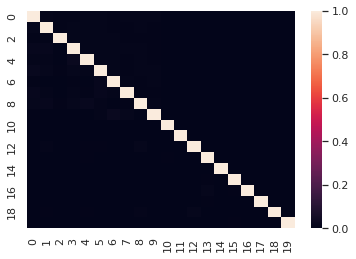

In [45]:
high = np.max(M)
low = np.min(M)
print(high)
sns.heatmap(M,vmax=high,vmin=low)






<AxesSubplot:>

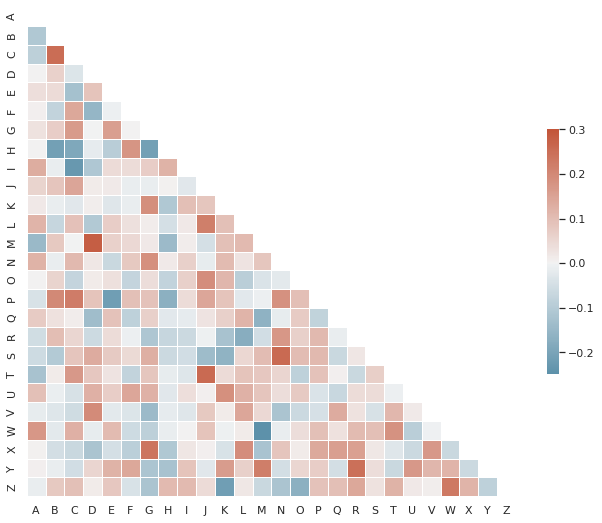

In [61]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
import pandas as pd

sc_data = pd.DataFrame()

client = []
value_iid = []
value_non = []
label_iid = []
label_non = []

for i in range(20):
    for j in range(20):
        if i!=j:
            client.append(int(i))
            if i>j: # 这时候得到的是非独立同分布下的数据，独立同分布下的数据是相反值
                iid_data = M1[j][i]
                non_data = M1[i][j]
            else:
                iid_data = M1[i][j]
                non_data = M1[j][i]
            value_iid.append(iid_data)
            value_non.append(non_data)
            if iid_data>dc_iid:
                label_iid.append('True')
            else:
                label_iid.append('False')
            if non_data>dc_non:
                label_non.append('True')
            else:
                label_non.append('False')

sc_data['client'] = client + client
sc_data['value'] = value_iid + value_non
sc_data['cutoff'] = label_iid + label_non
sc_data['distribute'] = ['IID']*380 + ['Non-IID']*380
sc_data


,client,value,cutoff,distribute
0,0,8.875871e+10,False,IID
1,0,9.166180e+10,False,IID
2,0,8.749232e+10,False,IID
3,0,9.675335e+10,False,IID
4,0,9.051554e+10,False,IID
...,...,...,...,...
755,19,1.428681e+11,False,Non-IID
756,19,1.526926e+11,False,Non-IID
757,19,1.446517e+11,False,Non-IID
758,19,1.288537e+11,False,Non-IID


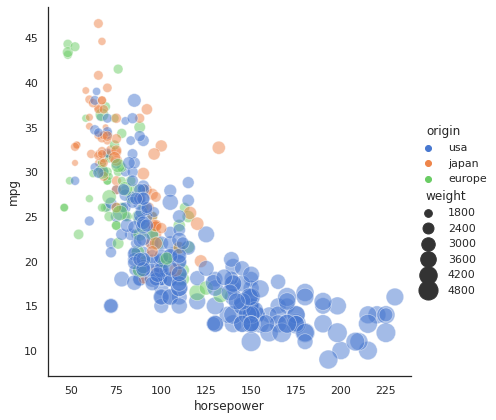

In [68]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

<AxesSubplot:xlabel='client', ylabel='value'>

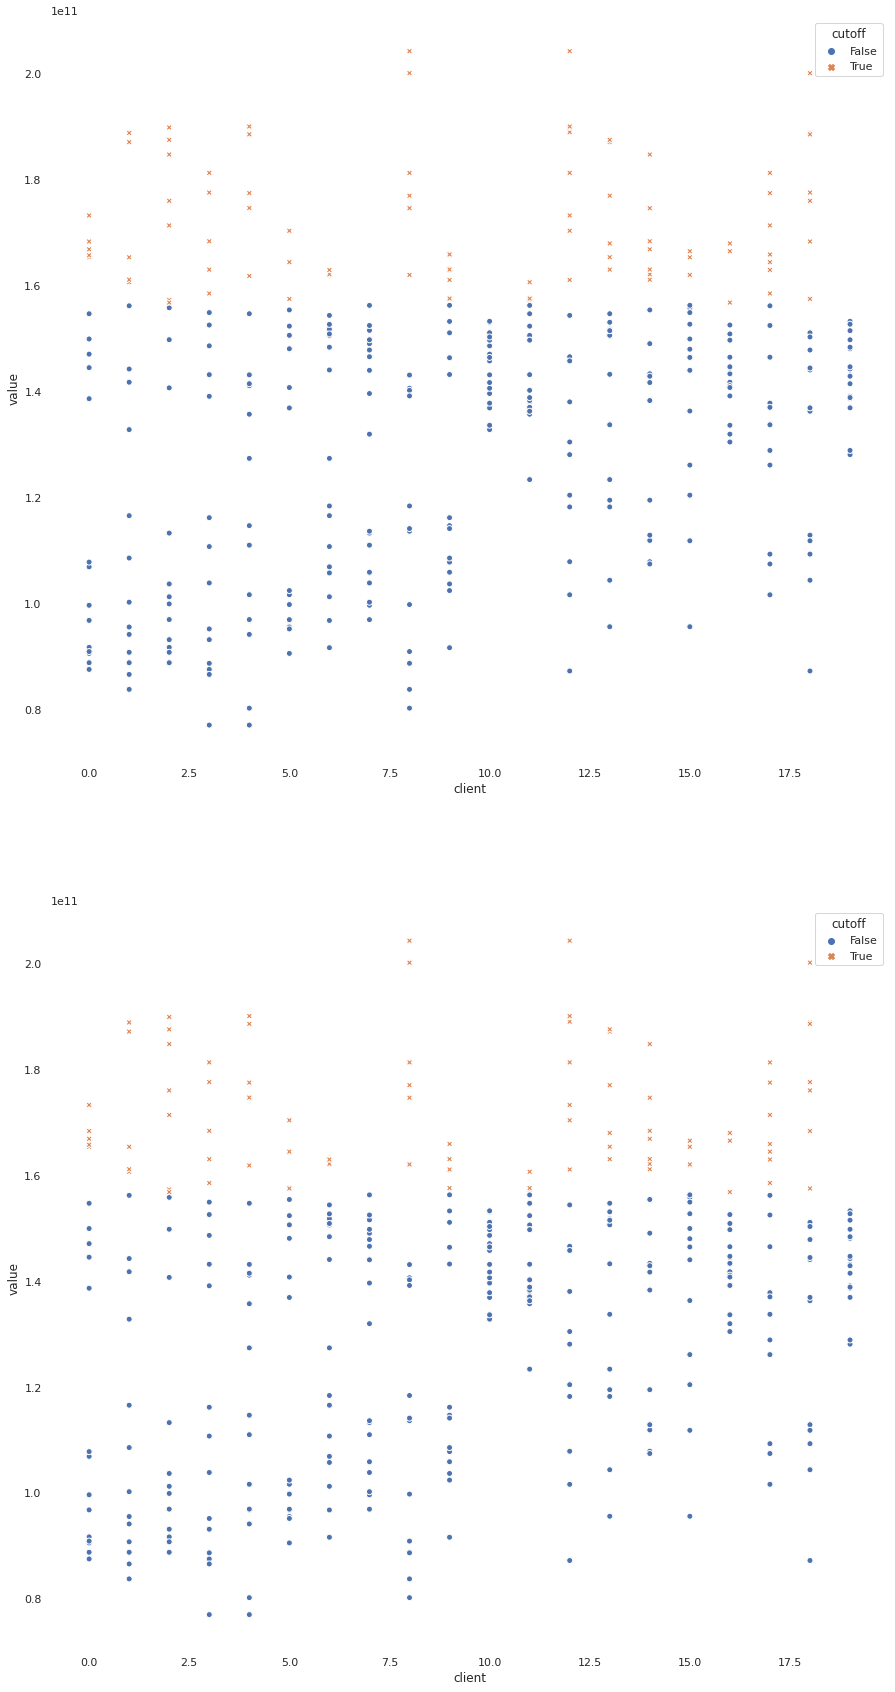

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(15, 30),nrows=1,ncols=2)
sns.despine(f, left=True, bottom=True)
# clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
# sns.scatterplot(x="carat", y="price",
#                 hue="clarity", size="depth",
#                 palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
#                 data=diamonds, ax=ax)
sns.scatterplot(x="client", y="value", hue="cutoff", style="cutoff",data=sc_data,linewidth=1,ax=ax[0])
sns.scatterplot(x="client", y="value", hue="cutoff", style="cutoff",data=sc_data,linewidth=1,ax=ax[1])

<AxesSubplot:xlabel='client', ylabel='value'>

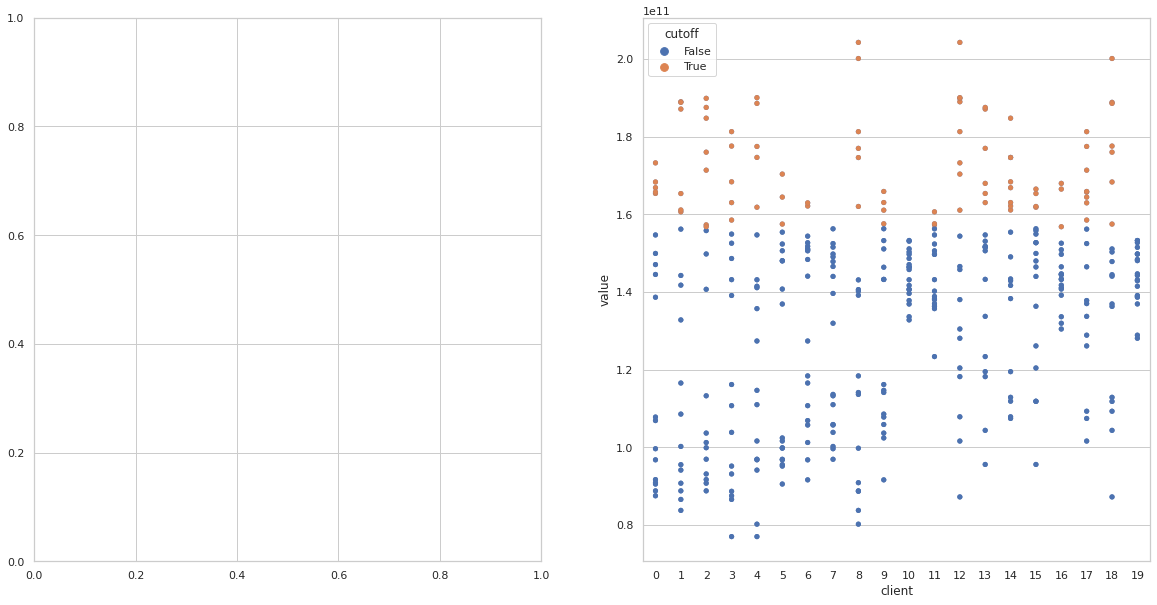

In [118]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 10),nrows=1,ncols=2)
sns.stripplot(x="client", y="value", hue="cutoff", 
              jitter=False,linewidth=0.1,edgecolor='b',data=sc_data)

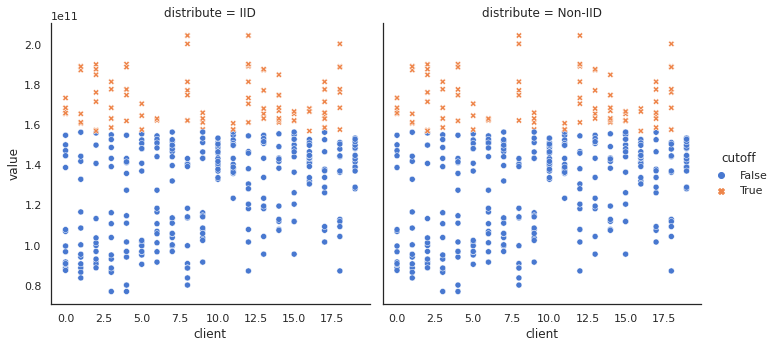

In [76]:
sns.set(style='darkgrid')
sns.relplot(x="client", y="value", hue="cutoff", style="cutoff", col="distribute",data=sc_data,palette="muted")

In [3]:
from sklearn import metrics
import numpy as np
import math


def weightToVec(weight):
    tmp = []
    for key,value in weight.items():
        tmp.extend(value.view(-1))
    return torch.Tensor(tmp)

def distNMI(A,B):
    return torch.tensor(metrics.normalized_mutual_info_score(A,B))

def distJoint(A,B):
    if type(A)!=torch.Tensor:
        A = torch.Tensor(A)
    if type(B)!=torch.Tensor:
        B = torch.Tensor(B)
    return -1*torch.log(0.7*distNMI(A,B) + 0.3*distCos(A,B))


# def distNMI(A,B):
#     return -1*torch.log(torch.tensor(metrics.normalized_mutual_info_score(A, B)))

def distEclud(A,B):
    return torch.sqrt(torch.sum(torch.pow((A-B),2)))

def distCos(A,B):
    return (1+torch.cosine_similarity(A,B,dim=0))/2

def distl2(A,B):
    return torch.norm((A-B))  

def findAttacker(weight_list):
    
    # weight_list = torch.Tensor(weight_list)
    W = torch.Tensor(weight_list)
    min_M = 99999

    #获得距离矩阵M
    M =np.random.rand(len(W),len(W))
    K = []
    for i in range(len(W)):
        for j in range(i,len(W)):
            # tmp = distJoint(W[i],W[j])
            tmp = distNMI(W[i],W[j])
            M[i][j]=tmp
            if i!=j:
                K.append(tmp)
                M[j][i]=M[i][j]
                if M[i][j]<min_M:
                    min_M = M[i][j]
    # 转变为tensor进行计算
    M = torch.Tensor(M)
    K_s = np.argsort(K)[math.ceil(len(K)*0.05)]
    # print(K)
    pc = K[K_s]
    print(pc)

    # 计算密度
    P=[]
    for i in range(len(M)):
        pi = 0
        for j in range(len(M[i])):
            if M[i][j]<pc and i!=j:
                pi = pi + 1
        P.append(pi)
    P = torch.Tensor(P)

    O = []
    for i in range(len(M)):
        oi=0
        tt = np.argwhere(P>P[i])
        if len(tt)>0:
            oi = torch.min(torch.index_select(M[i],0,torch.tensor(tt)))
        else: 
            oi = torch.max(M)   

    # max_M = torch.max(M)
    # # min_M = torch.min(M)
    # # print(torch.var(M))
    # # min_M = min_M/torch.var(M)


    # print(max_M)
    # print(min_M)
    # P=[]
    # for i in range(len(M)):
    #     # max_M=torch.max(M[i])
    #     pi = 0
    #     for j in range(len(M[i])):
    #         if i!=j and distl2(max_M,M[i][j]) >= distl2(min_M,M[i][j]):
    #         # if i!=j and M[i][j]<Ss[10]:
    #             pi = pi+1
    #     P.append(pi)
    
    # 计算密度均值，小于均值为好的client

    print(P)
    mean_P = torch.mean(P)
    normal_client = np.argwhere(P<=mean_P)
    attack_client = np.argwhere(P>mean_P)

    return normal_client.view(-1),attack_client.view(-1),M


W = [imgToVec(i,10) for i in range(0,20)]
# W[0]=-1*W[0]
# W[1]=-1*W[1]
# W[2]=-1*W[2]
# W[3]=-1*W[3]
# W[4]=-1*W[4]

n,a,m = findAttacker(W)


: 

: 

In [15]:
a

tensor([0, 1, 2, 4, 5])

In [20]:
def distJoint(A,B):
    A = torch.Tensor(A)
    B = torch.Tensor(B)
    return -1*torch.log(0.5*distNMI(A,B) + 0.5*distCos(A,B))

In [ ]:
def get_each_distance(distance,point_density,data,dc):
    nn = []
    for i in range(len(point_density)):
        aa = []
        for j in range(len(point_density)):
            if point_density[i] <= point_density[j] and i!=j:
                aa.append(j)
        ll = get_min_distance(aa,i,distance, point_density,data,dc)
        nn.append(ll)
    return nn

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import scipy.cluster.hierarchy as sch
W_list = [list(i) for i in W]
Z=sch.linkage(W_list,metric=distJoint) 


In [27]:
Z

array([[ 7.        , 11.        ,  0.61844972,  2.        ],
       [ 1.        ,  8.        ,  0.6547951 ,  2.        ],
       [12.        , 21.        ,  0.71305183,  3.        ],
       [17.        , 20.        ,  0.72036413,  3.        ],
       [ 9.        , 13.        ,  0.73995763,  2.        ],
       [14.        , 19.        ,  0.77132913,  2.        ],
       [16.        , 25.        ,  0.79373835,  3.        ],
       [ 2.        , 10.        ,  0.80354516,  2.        ],
       [ 3.        , 22.        ,  0.81069415,  4.        ],
       [ 6.        , 28.        ,  0.81245405,  5.        ],
       [ 5.        , 23.        ,  0.84212049,  4.        ],
       [24.        , 29.        ,  0.84342584,  7.        ],
       [15.        , 31.        ,  0.86016408,  8.        ],
       [26.        , 32.        ,  0.8622311 , 11.        ],
       [30.        , 33.        ,  0.89894961, 15.        ],
       [18.        , 34.        ,  0.9090986 , 16.        ],
       [ 4.        , 35.

In [23]:
cluster= sch.fcluster(Z, t=2, criterion='maxclust') 

array([[ 2.        ,  3.        ,  0.28574319,  2.        ],
       [ 1.        , 20.        ,  0.29397329,  3.        ],
       [ 4.        , 21.        ,  0.29592354,  4.        ],
       [ 5.        , 22.        ,  0.29600081,  5.        ],
       [ 0.        , 23.        ,  0.3051106 ,  6.        ],
       [ 7.        , 24.        ,  1.23427925,  7.        ],
       [14.        , 25.        ,  1.23840335,  8.        ],
       [ 9.        , 17.        ,  1.24444932,  2.        ],
       [12.        , 27.        ,  1.25635798,  3.        ],
       [ 8.        , 28.        ,  1.26035047,  4.        ],
       [18.        , 26.        ,  1.27163531,  9.        ],
       [10.        , 29.        ,  1.28405992,  5.        ],
       [ 6.        , 30.        ,  1.29914667, 10.        ],
       [13.        , 31.        ,  1.30175309,  6.        ],
       [15.        , 32.        ,  1.30285759, 11.        ],
       [11.        , 33.        ,  1.30455531,  7.        ],
       [34.        , 35.

In [95]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric

W = [imgToVec(i,100) for i in range(0,20)]

W_ten = torch.Tensor(W)
W_ten.cuda()

user_function = distJoint
sample = W_ten

metric = distance_metric(type_metric.USER_DEFINED, func=user_function)

# create K-Means algorithm with specific distance metric
start_centers = kmeans_plusplus_initializer(sample,2).initialize()
kmeans_instance = kmeans(sample, start_centers, metric=metric)
 
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()



/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous valu

In [113]:
def distJoint(A,B):
    if type(A)!=torch.Tensor:
        A = torch.Tensor(A)
    if type(B)!=torch.Tensor:
        B = torch.Tensor(B)
    return -1*torch.log(0.5*distNMI(A,B) + 0.5*distCos(A,B))

def KMeans(W):
    
    W_ten = torch.Tensor(W)
    W_ten.cuda()

    user_function = distJoint
    sample = W_ten

    metric = distance_metric(type_metric.USER_DEFINED, func=user_function)

    # create K-Means algorithm with specific distance metric
    start_centers = kmeans_plusplus_initializer(sample,2).initialize()
    kmeans_instance = kmeans(sample, start_centers, metric=metric)
    
    # run cluster analysis and obtain results
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    c1,c2 = kmeans_instance.get_centers()
    c1,c2 = torch.Tensor(c1),torch.Tensor(c2)

    # 判断有无单一元素的簇
    if len(clusters[0]) == 1:
        return clusters[1],clusters[0]
    elif len(clusters[1]) == 1:
        return clusters[0],clusters[1]
    else:
        # 计算簇到中心的均值判断谁是恶意客户端
        mean_c1 = torch.mean( torch.Tensor( [ distJoint(c1,W_ten[i]) for i in clusters[0]] ) )
        mean_c2 = torch.mean( torch.Tensor( [ distJoint(c2,W_ten[i]) for i in clusters[1]] ) )

        if mean_c1>=mean_c2:
            return clusters[0],clusters[1]
        else:
            return clusters[1],clusters[0]


W = [imgToVec(i,100) for i in range(0,20)]
n,a =  KMeans(W_ten)

/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous valu

In [109]:
type(torch.rand((2,2))) == torch.Tensor

True

In [114]:
a

[0, 1, 2, 3, 4, 5]

In [80]:
center = kmeans_instance.get_centers()

clusters

[[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5]]

In [81]:
kmeans_instance.get_total_wce()

18.83001214394671

In [82]:
distJoint(center[0],center[1])

/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


tensor(1.8220, dtype=torch.float64)

In [89]:
distJoint(center[0],W[9])

/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


tensor(1.0289, dtype=torch.float64)

In [84]:
distJoint(center[1],W[4])

/root/anaconda3/envs/yuan/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


tensor(0.7503, dtype=torch.float64)

In [57]:
clusters

[[6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 10]]

### 绘图

<AxesSubplot:>

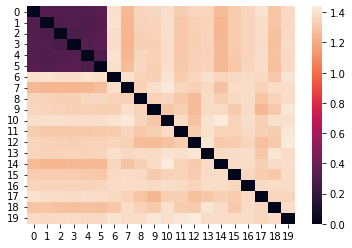

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(m)

In [72]:
k = {1:8,7:3,4:5}

In [76]:
def sortDict(d):
    new_key = sorted(d)
    tmp = {}
    for i in new_key:
        tmp[i] = d[i]
    return tmp

In [4]:
import pandas as pd

file_path = '/mnt/tt_non.log'

with open(file_path) as f:
    for line in  f.readlines():
        if 'attack' in line:
            print(line)






attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor([], dtype=torch.int64)

attack_id:tensor